In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
from catboost import CatBoostClassifier as cb
from catboost import Pool
from catboost import CatBoostRegressor as cbr

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
pd.set_option('display.max_columns', None)

In [125]:
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
y = houses['SalePrice']

In [128]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [129]:
X = houses.drop(columns=['SalePrice'])

In [130]:
len(X.columns)

80

In [131]:
X.shape

(1460, 80)

In [132]:
y = np.log10(y)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([4.54282543, 4.67633758, 4.80984973, 4.94336188, 5.07687404,
        5.21038619, 5.34389834, 5.47741049, 5.61092265, 5.7444348 ,
        5.87794695]),
 <BarContainer object of 10 artists>)

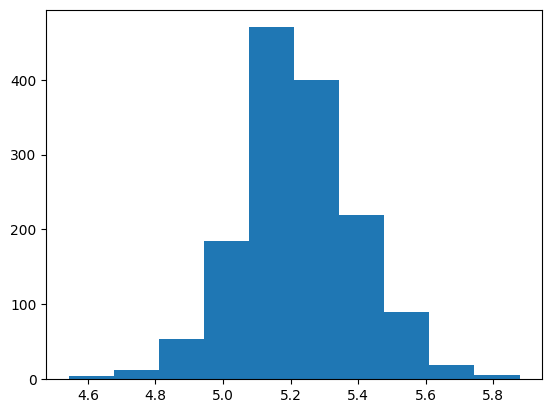

In [133]:
plt.hist(y)

In [134]:
X.drop('Id', axis=1, inplace=True)

In [135]:
categorical = ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","ExterQual","ExterCond","Foundation","Heating","HeatingQC","CentralAir","KitchenQual","Functional","PavedDrive","SaleType","SaleCondition","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond",'MiscFeature','Fence','FireplaceQu','PoolQC','Alley','MasVnrType']

In [136]:
regressors = [col for col in list(X.columns) if col not in categorical] 
regressors

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [137]:
len(categorical) + len(regressors)

79

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 369.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 824.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 181.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          5.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.

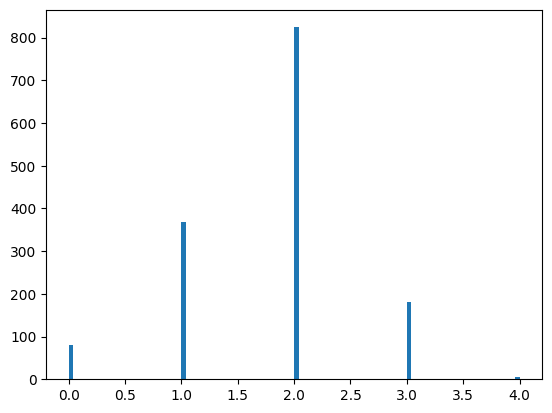

In [138]:
plt.hist(X['GarageCars'], bins=100)

In [139]:
logregressors = [
    'MSSubClass',
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    '1stFlrSF',
    'GrLivArea',
    'MiscVal',
    'PoolArea',
    'ScreenPorch',
    'BsmtFinSF1',
    'BsmtFinSF2',
    '3SsnPorch',
    'BsmtUnfSF',
    'EnclosedPorch',
    'TotalBsmtSF',
    'OpenPorchSF',
    'WoodDeckSF',
    'GarageArea',
]

In [140]:
X[logregressors] = X[logregressors].apply(lambda x: np.log(x + 1))

In [25]:
from feature_engine.outliers import OutlierTrimmer

In [ ]:
ot = OutlierTrimmer(capping_method='iqr', tail='both', fold=3, missing_values='ignore')
ot.fit(X, y)
X, y = ot.transform_x_y(X, y=y)

In [387]:
X_outliers = X[regressors].drop(['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1)
X_outliers

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,854,7.444833,1,0,2,1,3,8,0,2003.0,2,6.308098,0.000000,4.127134,0.000000,0.0,2,2008
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0,7.141245,0,1,2,0,3,6,1,1976.0,2,6.133398,5.700444,0.000000,0.000000,0.0,5,2007
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,866,7.488294,1,0,2,1,3,6,1,2001.0,2,6.411818,0.000000,3.761200,0.000000,0.0,9,2008
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,756,7.448916,1,0,1,0,3,7,1,1998.0,3,6.466145,0.000000,3.583519,5.609472,0.0,2,2006
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,1053,7.695758,1,0,2,1,4,9,1,2000.0,3,6.729824,5.262690,4.442651,0.000000,0.0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,694,7.407318,0,0,2,1,3,7,1,1999.0,2,6.133398,0.000000,3.713572,0.000000,0.0,8,2007
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0,7.637234,1,0,2,0,3,7,2,1978.0,2,6.216606,5.857933,0.000000,0.000000,0.0,2,2010
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,6.777647,7.050123,7.080868,1152,7.758333,0,0,2,0,4,9,2,1941.0,1,5.533389,0.000000,4.110874,0.000000,0.0,5,2010
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,0.000000,6.983790,6.983790,0,6.983790,1,0,1,0,2,5,0,1950.0,1,5.484797,5.905362,0.000000,4.727388,0.0,4,2010


In [432]:
X_outliers = X[logregressors].drop(['MiscVal', 'PoolArea', '3SsnPorch'],axis=1)

In [468]:
X_regressors = X[regressors].drop(['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal','ScreenPorch','BsmtFinSF2','BsmtHalfBath'], axis=1)

In [471]:
X_regressors

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,5.017280,6.753438,6.753438,854,7.444833,1,2,1,3,8,0,2003.0,2,6.308098,0.000000,4.127134,0.000000,2,2008
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,5.652489,7.141245,7.141245,0,7.141245,0,2,0,3,6,1,1976.0,2,6.133398,5.700444,0.000000,0.000000,5,2007
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,6.075346,6.825460,6.825460,866,7.488294,1,2,1,3,6,1,2001.0,2,6.411818,0.000000,3.761200,0.000000,9,2008
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,6.293419,6.629363,6.869014,756,7.448916,1,1,0,3,7,1,1998.0,3,6.466145,0.000000,3.583519,5.609472,2,2006
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,6.196444,7.044033,7.044033,1053,7.695758,1,2,1,4,9,1,2000.0,3,6.729824,5.262690,4.442651,0.000000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,6.860664,6.860664,6.860664,694,7.407318,0,2,1,3,7,1,1999.0,2,6.133398,0.000000,3.713572,0.000000,8,2007
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,6.380123,7.341484,7.637234,0,7.637234,1,2,0,3,7,2,1978.0,2,6.216606,5.857933,0.000000,0.000000,2,2010
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,6.777647,7.050123,7.080868,1152,7.758333,0,2,0,4,9,2,1941.0,1,5.533389,0.000000,4.110874,0.000000,5,2010
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,0.000000,6.983790,6.983790,0,6.983790,1,1,0,2,5,0,1950.0,1,5.484797,5.905362,0.000000,4.727388,4,2010


In [469]:
ot = OutlierTrimmer(capping_method='quantiles', tail='both', fold=0.05, missing_values='ignore')
X_cleaned = X_regressors.copy()

for col in X_regressors.columns:
    ot.fit(pd.DataFrame(X_regressors[col]))
    X_cleaned[col] = ot.transform(pd.DataFrame(X_regressors[col]))


In [470]:
X_cleaned

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
0,4.110874,4.189655,9.042040,7.0,5.0,2003.0,2003.0,5.283204,6.561031,5.017280,6.753438,6.753438,854.0,7.444833,1.0,2.0,1.0,3.0,8.0,0.0,2003.0,2.0,6.308098,0.000000,4.127134,0.000000,2.0,2008
1,3.044522,4.394449,9.169623,6.0,8.0,1976.0,1976.0,0.000000,6.886532,5.652489,7.141245,7.141245,0.0,7.141245,0.0,2.0,0.0,3.0,6.0,1.0,1976.0,2.0,6.133398,5.700444,0.000000,0.000000,5.0,2007
2,4.110874,4.234107,9.328212,7.0,5.0,2001.0,2002.0,5.093750,6.188264,6.075346,6.825460,6.825460,866.0,7.488294,1.0,2.0,1.0,3.0,6.0,1.0,2001.0,2.0,6.411818,0.000000,3.761200,0.000000,9.0,2008
3,4.262680,4.110874,9.164401,7.0,5.0,NaN,1970.0,0.000000,5.379897,6.293419,6.629363,6.869014,756.0,7.448916,1.0,1.0,0.0,3.0,7.0,1.0,1998.0,3.0,6.466145,0.000000,3.583519,NaN,2.0,2006
4,4.110874,4.442651,9.565284,8.0,5.0,2000.0,2000.0,5.860786,6.486161,6.196444,7.044033,7.044033,1053.0,7.695758,1.0,2.0,1.0,4.0,9.0,1.0,2000.0,3.0,6.729824,5.262690,4.442651,0.000000,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6.0,5.0,1999.0,2000.0,0.000000,0.000000,6.860664,6.860664,6.860664,694.0,7.407318,0.0,2.0,1.0,3.0,7.0,1.0,1999.0,2.0,6.133398,0.000000,3.713572,0.000000,8.0,2007
1456,3.044522,4.454347,9.486152,6.0,6.0,1978.0,1988.0,4.787492,6.673298,6.380123,7.341484,NaN,0.0,7.637234,1.0,2.0,0.0,3.0,7.0,2.0,1978.0,2.0,6.216606,NaN,0.000000,0.000000,2.0,2010
1457,4.262680,4.204693,9.109746,7.0,NaN,1941.0,2006.0,0.000000,5.620401,6.777647,7.050123,7.080868,NaN,7.758333,0.0,2.0,0.0,4.0,9.0,2.0,1941.0,1.0,5.533389,0.000000,4.110874,0.000000,5.0,2010
1458,3.044522,4.234107,9.181735,5.0,6.0,1950.0,1996.0,0.000000,3.912023,0.000000,6.983790,6.983790,0.0,6.983790,1.0,1.0,0.0,2.0,5.0,0.0,1950.0,1.0,5.484797,NaN,0.000000,4.727388,4.0,2010


In [141]:
len(categorical)

43

In [142]:
X['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [143]:
X[categorical] = X[categorical].fillna('missing')

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
y_train

254     5.161368
1066    5.250420
638     4.929419
799     5.243038
380     5.103804
          ...   
1095    5.246577
1130    5.130334
1294    5.060698
860     5.278639
1126    5.240549
Name: SalePrice, Length: 1168, dtype: float64

In [146]:
ss = StandardScaler()

In [99]:
ss.fit(pd.DataFrame(y_train))

StandardScaler()

In [ ]:
#y_train_scaled = ss.transform(pd.DataFrame(y_train)).reshape(-1)

(array([  3.,   9.,  39., 137., 370., 333., 185.,  73.,  15.,   4.]),
 array([-4.02214079, -3.23818234, -2.45422388, -1.67026542, -0.88630696,
        -0.1023485 ,  0.68160995,  1.46556841,  2.24952687,  3.03348533,
         3.81744378]),
 <BarContainer object of 10 artists>)

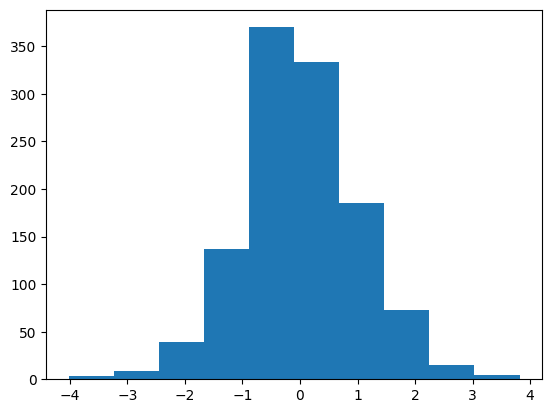

In [ ]:
#plt.hist(y_train_scaled)

In [147]:
houses['MiscFeature'].isna().sum()

1406

In [148]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,3.044522,RL,4.262680,9.036106,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,missing,0.000000,TA,Gd,CBlock,TA,TA,No,Rec,6.827629,Unf,0.0,5.973810,7.181592,GasA,TA,Y,SBrkr,7.181592,0,0,7.181592,1,0,1,0,3,1,TA,5,Typ,0,missing,Attchd,1957.0,RFn,1,5.686975,TA,TA,Y,5.525453,0.000000,0.000000,0.0,0.0,0.0,missing,missing,missing,0.0,6,2010,WD,Normal
1066,4.110874,RL,4.094345,8.966739,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,missing,0.000000,Gd,TA,PConc,Gd,TA,No,Unf,0.000000,Unf,0.0,6.684612,6.684612,GasA,Gd,Y,SBrkr,6.684612,772,0,7.360104,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,5.942799,TA,TA,Y,0.000000,3.713572,0.000000,0.0,0.0,0.0,missing,missing,missing,0.0,5,2009,WD,Normal
638,3.433987,RL,4.219508,9.080004,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,missing,0.000000,TA,TA,CBlock,Fa,TA,No,Unf,0.000000,Unf,0.0,6.680855,6.680855,GasA,Gd,Y,FuseA,6.680855,0,0,6.680855,0,0,1,0,2,1,TA,4,Typ,0,missing,missing,NaN,missing,0,0.000000,missing,missing,P,5.796058,0.000000,5.105945,0.0,0.0,0.0,missing,MnPrv,missing,0.0,5,2008,WD,Normal
799,3.931826,RL,4.110874,8.881975,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,5.533389,TA,TA,BrkTil,Gd,TA,No,ALQ,6.345636,Unf,0.0,5.093750,6.595781,GasA,Ex,Y,SBrkr,6.889591,787,0,7.478170,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,5.484797,TA,TA,Y,0.000000,0.000000,5.579730,0.0,0.0,0.0,missing,MnPrv,missing,0.0,6,2007,WD,Normal
380,3.931826,RL,3.931826,8.517393,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,missing,0.000000,TA,TA,BrkTil,TA,TA,No,LwQ,5.389072,Unf,0.0,6.695799,6.934397,GasA,TA,Y,SBrkr,6.934397,665,0,7.433667,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,5.733341,TA,TA,Y,0.000000,0.000000,5.493061,0.0,0.0,0.0,missing,missing,missing,0.0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3.044522,RL,4.369448,9.139703,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,missing,0.000000,Gd,TA,PConc,Gd,TA,No,GLQ,3.218876,Unf,0.0,7.163172,7.181592,GasA,Gd,Y,SBrkr,7.181592,0,0,7.181592,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,6.089045,TA,TA,Y,0.000000,3.135494,0.000000,0.0,0.0,0.0,missing,missing,missing,0.0,3,2007,WD,Normal
1130,3.931826,RL,4.189655,8.962520,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,missing,0.000000,TA,TA,BrkTil,TA,TA,No,BLQ,6.434547,Unf,0.0,6.216606,7.023759,GasA,TA,Y,SBrkr,7.192182,653,0,7.591862,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,6.357842,TA,TA,Y,6.068426,3.806662,0.000000,0.0,0

In [149]:
len(regressors)

36

In [150]:
len(X_train.columns)

79

In [151]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'MiscFeature',
 'Fence',
 'FireplaceQu',
 'PoolQC',
 'Alley',
 'MasVnrType']

In [ ]:
model = cbr(
    iterations=4000,
    cat_features=categorical,
    learning_rate=0.02,
    depth=10,
    l2_leaf_reg=11,
    loss_function='RMSE',
    verbose=50,
)


In [199]:
X_train.iloc[:, 27]

254     Gd
1066    TA
638     TA
799     TA
380     TA
        ..
1095    TA
1130    TA
1294    TA
860     TA
1126    TA
Name: ExterCond, Length: 1168, dtype: object

In [216]:
model.fit(X_train, y_train, verbose=50)

0:	learn: 0.1619972	total: 177ms	remaining: 11m 48s
50:	learn: 0.0537578	total: 10.9s	remaining: 14m 3s
100:	learn: 0.0403985	total: 24.5s	remaining: 15m 45s
150:	learn: 0.0342774	total: 42.5s	remaining: 18m 4s
200:	learn: 0.0291356	total: 1m 1s	remaining: 19m 31s
250:	learn: 0.0253385	total: 1m 20s	remaining: 19m 56s
300:	learn: 0.0222462	total: 1m 36s	remaining: 19m 40s
350:	learn: 0.0197548	total: 1m 50s	remaining: 19m 9s
400:	learn: 0.0178344	total: 2m 14s	remaining: 20m 6s
450:	learn: 0.0161643	total: 2m 41s	remaining: 21m 7s
500:	learn: 0.0145904	total: 3m 1s	remaining: 21m 9s
550:	learn: 0.0131058	total: 3m 25s	remaining: 21m 26s
600:	learn: 0.0117357	total: 3m 44s	remaining: 21m 9s
650:	learn: 0.0107141	total: 4m 4s	remaining: 20m 56s
700:	learn: 0.0096656	total: 4m 24s	remaining: 20m 43s
750:	learn: 0.0085531	total: 4m 43s	remaining: 20m 26s
800:	learn: 0.0077795	total: 5m 2s	remaining: 20m 8s
850:	learn: 0.0070389	total: 5m 19s	remaining: 19m 42s
900:	learn: 0.0063409	total: 

In [223]:
model.save_model('cbm_4000_0.1_10_11.cbm')

In [217]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,GrLivArea,14.594993
1,OverallQual,11.071878
2,1stFlrSF,3.987186
3,LotArea,3.915010
4,KitchenQual,3.744033
...,...,...
74,3SsnPorch,0.007219
75,Street,0.005390
76,Utilities,0.000976
77,Condition2,0.000318


In [218]:
y_pred = 10**(model.predict(X_test))

In [219]:
y_pred

array([148762.9535794 , 362235.91779777, 112309.81523743, 142432.35550082,
       332970.87250014,  81831.31631946, 232598.36579583, 141170.072966  ,
        76845.70523023, 136008.27782271, 153878.16989471, 116838.42799219,
       110198.63903886, 208864.72812606, 166605.44672409, 134065.82839077,
       193386.75448225, 127493.78414992, 112969.10185553, 226117.16923112,
       162205.66644562, 224941.41158279, 178274.41458605, 126490.50851224,
       204015.95150682, 166133.82877751, 191466.74075574, 107957.59883388,
       176138.58398043, 188386.06763028, 124795.08506595, 268357.70952516,
       189773.6919365 , 105551.36700292, 267730.25602801, 149861.33126997,
       140069.28416891, 196624.41195494, 352839.02547544, 100894.66506959,
       121458.95283936, 240456.03148612, 115467.61864198, 373670.5691268 ,
       124979.4420102 , 130027.59125588, 109374.06452282, 128481.59634038,
       396659.47483345, 129174.51758969, 118520.07395176, 197574.49243171,
       117896.21543745, 3

In [220]:
y_test_unscaled = 10**y_test

In [165]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [112]:
y_test_scaled = ss.transform(pd.DataFrame(y_test)).reshape(-1)

(array([ 2.,  3., 14., 44., 98., 66., 42., 17.,  3.,  3.]),
 array([-3.99215498, -3.20778011, -2.42340524, -1.63903038, -0.85465551,
        -0.07028065,  0.71409422,  1.49846909,  2.28284395,  3.06721882,
         3.85159369]),
 <BarContainer object of 10 artists>)

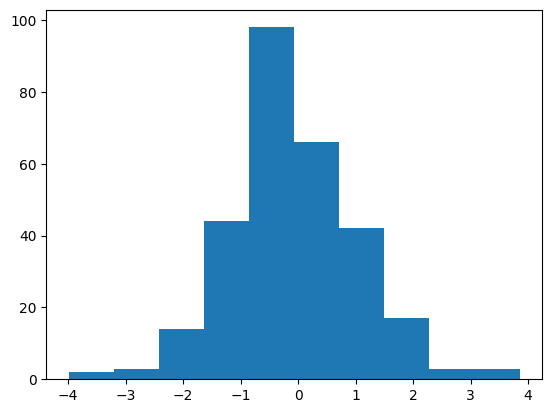

In [113]:
plt.hist(y_test_scaled)

(array([  3.,   9.,  39., 137., 370., 333., 185.,  73.,  15.,   4.]),
 array([-4.02214079, -3.23818234, -2.45422388, -1.67026542, -0.88630696,
        -0.1023485 ,  0.68160995,  1.46556841,  2.24952687,  3.03348533,
         3.81744378]),
 <BarContainer object of 10 artists>)

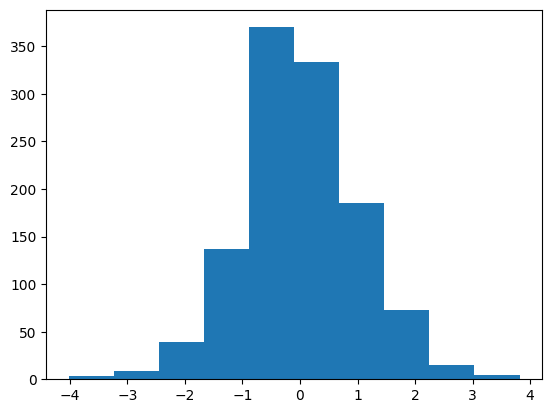

In [114]:
plt.hist(y_train_scaled)

In [221]:
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred))
print(f"Test RMSE: {rmse}")

Test RMSE: 29779.92354910032


In [222]:
r2 = r2_score(y_test_unscaled, y_pred)
print(f"Test R²: {r2}")

Test R²: 0.8843799047608583


In [ ]:
from sklearn.model_selection import GridSearchCV

cvmodel = cbr(cat_features=categorical, loss_function='RMSE')

parameters = {
            'depth' : [6,8,10],
            'learning_rate' : [0.01, 0.05, 0.1],
            'iterations'    : [50, 100, 1000, 2000],
            'l2_leaf_reg'   : [1, 4, 9]
              }

grid = GridSearchCV(estimator=cvmodel, param_grid = parameters, cv = 2, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


KeyboardInterrupt: 

In [569]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train, y_train_scaled, cv=kf, scoring='r2')


0:	learn: 0.9964318	total: 54.9ms	remaining: 3m 39s
50:	learn: 0.6215663	total: 3.04s	remaining: 3m 55s
100:	learn: 0.4610276	total: 5.82s	remaining: 3m 44s
150:	learn: 0.3859536	total: 8.51s	remaining: 3m 36s
200:	learn: 0.3446748	total: 11.2s	remaining: 3m 30s
250:	learn: 0.3192582	total: 13.9s	remaining: 3m 26s
300:	learn: 0.3005890	total: 16.5s	remaining: 3m 22s
350:	learn: 0.2884266	total: 19s	remaining: 3m 17s
400:	learn: 0.2778743	total: 21.6s	remaining: 3m 14s
450:	learn: 0.2697968	total: 24.4s	remaining: 3m 11s
500:	learn: 0.2635244	total: 27s	remaining: 3m 8s
550:	learn: 0.2580777	total: 29.7s	remaining: 3m 5s
600:	learn: 0.2532120	total: 32.3s	remaining: 3m 2s
650:	learn: 0.2480898	total: 35s	remaining: 3m
700:	learn: 0.2440942	total: 37.8s	remaining: 2m 57s
750:	learn: 0.2404531	total: 40.5s	remaining: 2m 55s
800:	learn: 0.2364180	total: 43.1s	remaining: 2m 52s
850:	learn: 0.2332258	total: 46s	remaining: 2m 50s
900:	learn: 0.2290656	total: 48.7s	remaining: 2m 47s
950:	learn

In [570]:
scores

array([0.86024677, 0.93555535, 0.89238525, 0.87830393, 0.93284439,
       0.83312931, 0.91713409, 0.92254483, 0.93845652, 0.89242998])

In [571]:
scores.mean()

0.900303040874095

In [193]:
model.fit(X_train, y_train_scaled, verbose=50)

0:	learn: 0.9878692	total: 80.7ms	remaining: 32.2s
50:	learn: 0.6141421	total: 5.21s	remaining: 35.6s
100:	learn: 0.4585740	total: 10.6s	remaining: 31.3s
150:	learn: 0.3883798	total: 15.7s	remaining: 25.9s
200:	learn: 0.3469022	total: 21s	remaining: 20.8s
250:	learn: 0.3209332	total: 26.3s	remaining: 15.6s
300:	learn: 0.3031992	total: 31.2s	remaining: 10.3s
350:	learn: 0.2906926	total: 36.4s	remaining: 5.08s
399:	learn: 0.2812891	total: 41.4s	remaining: 0us


In [ ]:
X_train[categorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
254,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,Gd,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal,TA,TA,No,Rec,Unf,SBrkr,Attchd,RFn,TA,TA
1066,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Gd,Y,TA,Typ,Y,WD,Normal,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA
638,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,TA,TA,CBlock,GasA,Gd,Y,TA,Typ,P,WD,Normal,Fa,TA,No,Unf,Unf,FuseA,missing,missing,missing,missing
799,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,Gd,TA,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
380,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,TA,TA,BrkTil,GasA,TA,Y,Gd,Typ,Y,WD,Normal,TA,TA,No,LwQ,Unf,SBrkr,Detchd,Unf,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Gd,Y,Gd,Typ,Y,WD,Normal,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1130,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,TA,TA,BrkTil,GasA,TA,Y,Gd,Min2,Y,WD,Normal,TA,TA,No,BLQ,Unf,SBrkr,Detchd,Unf,TA,TA
1294,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,WdShing,Plywood,TA,TA,CBlock,GasA,TA,Y,TA,Typ,N,WD,Normal,TA,TA,No,Rec,Unf,SBrkr,Detchd,Unf,TA,TA
860,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,Gd,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Normal,TA,TA,No,Unf,Unf,SBrkr,Detchd,Unf,TA,TA


In [1]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
feat_importance = model.get_feature_importance(prettified=True)
feat_importance.head(20)

,Feature Id,Importances
0,GrLivArea,19.120158
1,OverallQual,18.956367
2,1stFlrSF,4.830759
3,TotalBsmtSF,4.525839
4,KitchenQual,4.502585
5,BsmtQual,3.841620
6,LotArea,3.372137
7,Fireplaces,3.140937
8,GarageFinish,3.099113
9,GarageCars,2.975915


In [ ]:
truncated_importance = feat_importance.head(20)
plt.barh(feat_importance['Feature Id'], feat_importance['Importances'])

NameError: name 'feat_importance' is not defined

(array([  2.,   0.,  23., 159., 312., 400., 206.,  54.,   9.,   3.]),
 array([2.52374647, 2.64651513, 2.76928379, 2.89205245, 3.01482111,
        3.13758977, 3.26035844, 3.3831271 , 3.50589576, 3.62866442,
        3.75143308]),
 <BarContainer object of 10 artists>)

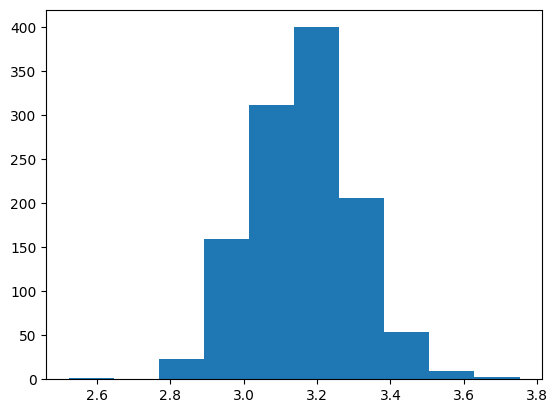

In [198]:
plt.hist(np.log10(X_train['GrLivArea']))

(array([  2.,  18.,  79., 304., 349., 269., 132.,  12.,   2.,   1.]),
 array([2.52374647, 2.63850762, 2.75326877, 2.86802993, 2.98279108,
        3.09755224, 3.21231339, 3.32707454, 3.4418357 , 3.55659685,
        3.671358  ]),
 <BarContainer object of 10 artists>)

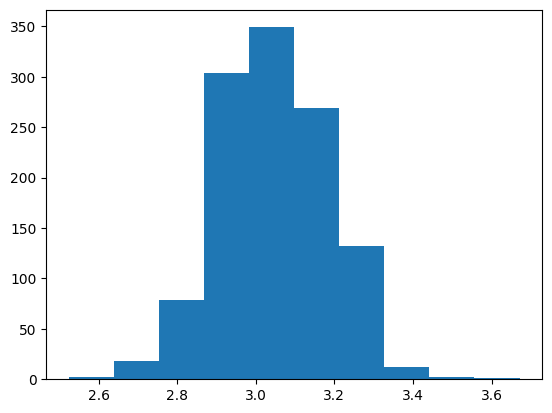

In [200]:
plt.hist(np.log10(X_train['1stFlrSF']))

In [237]:
X_train.iloc[:,60]

254      TA
1066     TA
638     NaN
799      TA
380      TA
       ... 
1095     TA
1130     TA
1294     TA
860      TA
1126     TA
Name: GarageCond, Length: 1168, dtype: object

In [39]:
X_train.head(39)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,0,5,2010,WD,Normal,127000
303,304,20,RL,70.0,9800,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,7,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,TA,TA,No,ALQ,894,Unf,0,0,894,GasA,TA,Y,SBrkr,894,0,0,894,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1975.0,Unf,2,552,TA,TA,Y,256,0,0,0,0,0,0,7,2006,WD,Abnorml,149900
86,87,60,RL,122.0,11911,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,684,876,0,1560,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,0,3,2009,WD,Normal,174000
1385,1386,50,RM,40.0,5436,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,8,1922,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,735,Unf,0,61,796,GasA,Gd,Y,SBrkr,796,358,0,1154,1,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1922.0,Unf,1,240,TA,TA,N,0,96,0,0,0,0,0,5,2010,WD,Normal,125500
265,266,20,RL,78.0,12090,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,210.0,TA,Gd,CBlock,Gd,TA,No,GLQ,588,LwQ,228,606,1422,GasA,TA,Y,SBrkr,1422,0,0,1422,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,576,TA,TA,Y,276,0,0,0,0,0,0,6,2008,WD,Normal,175500
793,794,20,RL,76.0,9158,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,Stone,140.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1496,1496,GasA,Ex,Y,SBrkr,1496,0,0,1496,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,2,474,TA,TA,Y,168,130,0,0,0,0,0,6,2007,New,Partial,225000


In [ ]:
#q: how many missing values are there in the Alley column?